# Mathematics for Data Science

## Midterm Exam (Part 2) - Take-Home Problems

#### Deadline: 11:59pm May 16, 2020 (Sunday)

This midterm should be submitted <b><u>individually</u></b>.   

Name:

<b><u>Read the instructions and questions carefully.</u></b>

Do <b><u>NOT</u></b> import any other libraries aside from those below.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from sklearn import datasets

plt.rcParams['figure.figsize'] = [15, 5]

---

## I. Curve Fitting (15 pts.)

### Airline Passengers

<i>Note</i>: The dataset you will be using is a <b><u>synthetically generated version</b></u> of the classic dataset by Box & Jenkins (International Airline Passengers: Monthly Totals for January 1949 to December 1960).

Suppose that you've been hired by Philippine Airlines to perform exploratory data analysis (EDA) on their monthly total airline passenger numbers.

#### Q1. (5 pts.)

Load the `AirPassengers.csv` data and create a plot with appropriate axis labels and title.

,Passengers
0,94
1,99
2,108
3,102
4,96


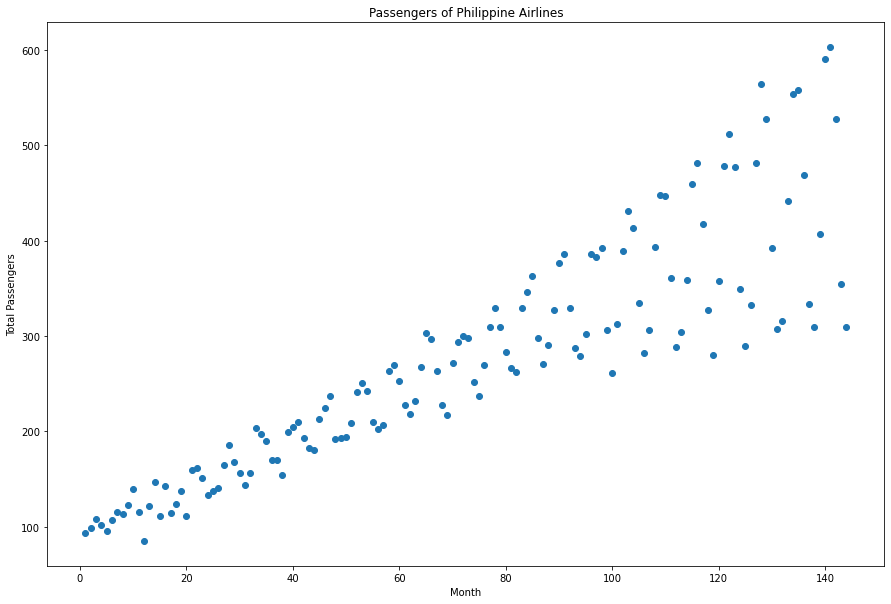

In [33]:
# Your code here
df_AP = pd.read_csv('AirPassengers.csv')
display(df_AP.head())

y = df_AP['Passengers'].to_numpy()
x = df_AP.index.to_numpy()
x = x + 1

plt.rcParams['figure.figsize'] = [15,10]
plt.scatter(x, y) ## plot the data as points (there are other ways to do this)
plt.title("Passengers of Philippine Airlines")
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.show()


#### Q2. (5 pts.)
Choose a model (i.e. a function or combination of functions) and fit the model to the data. Plot your function on top of the data.

(<b><i>Hint</b></i>: Depending on your model, `curve_fit` may give bad results or not converge if you don't tweak your initial guesses `p0`)

A: 0.009587730016925264
f: 1.000170240214332
C: -1.0174477252213072
alpha: 1.9577890340207358
m: 2.612830497879397
B: 87.21082347701318
SSR: 18441.480900291117


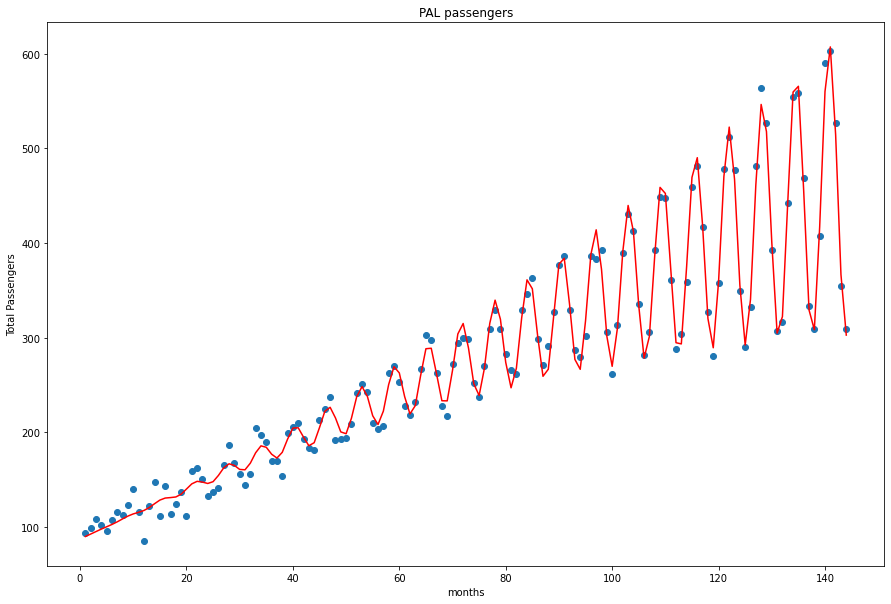

In [34]:
def func(x,A,f,C,alpha,m,B):
#     return A * (x**(B*np.sin(f*(x+C))+D)) + E*x + G
    return A*np.sin(f*(x+C)) * x**(alpha) + m*x + B

popt, pcov = curve_fit(func, x, y, \
                       p0=[0.009588530492320831,1.0001702352687385,\
                           -2,1.9577715426715665,\
                           2.6128303948554605,87.21082854748511])

ssr = sum((y - func(x, *popt))**2)

print('A:',popt[0])
print('f:',popt[1])
print('C:',popt[2])
print('alpha:',popt[3])
print('m:',popt[4])
print('B:',popt[5])


print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), len(df_AP))

plt.plot(x_range, func(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("PAL passengers")
plt.xlabel('months')
plt.ylabel('Total Passengers')
plt.show()

#### Q3. (5 pts.)
You've been asked to present your findings to the board of directors of PAL.

Describe the nature of the data, why you chose your model, and how you can use your model to <b><u>provide value</b></u> to the company.

(Note: points will be awarded for <b><u>clarity and succinctness</b></u>. points will be deducted for <b><u>vagueness and rambling</b></u>.)

#### ANSWER HERE.

The data appears to be have upward trend oscillations with the magnitude of oscillation increasing as months go by.  The model proposed exhibits this behavior which resulted to a sum of squared residuals statistic of 18441.5. The model suggests the relationship of months and total passengers follows this behavior. From this model, we can infer the degree by which months predict the number of passengers.

---

## II. Data Sampling (25 pts.)

### Dungeons & Dragons

[`Dungeons & Dragons (D&D)`](https://en.wikipedia.org/wiki/Dungeons_%26_Dragons) is a fantasy tabletop role-playing game designed by Gary Gygax and Dave Arneson and was first released in 1974.

In its latest version, 5th Edition D&D, players may roll dice to randomly determine the starting values for each of their character's six ability scores: Strength (STR), Dexterity (DEX), Constitution (CON), Intelligence (INT), Wisdom (WIS), and Charisma (CHA).

The rules for doing so are as follows:

1) Roll a 6-sided die four times (in D&D terminology, we say "roll 4d6").

2) Discard the lowest result.

3) Add the remaining values.

For example, suppose I am rolling for my character's Strength. I roll a 4d6 and observe $[6, 3, 2, 2]$. I discard the lowest result (which is $2$), and add $6 + 3 + 2 = 11$. Therefore, my character's STR stat is $11$.

Suppose you are creating a character and are rolling dice to determine their Intelligence. Following the rules above, let $X$ be the result.

#### Q1. (5 pts.)

Simulate 100,000 $X$ values.

Print the minimum, mean, and maximum values of your $X$ simulations.

In [35]:
np.random.seed(1) # Set seed to 1 to fix results.

d1 = [1,2,3,4,5,6]

n = 4
# rolls = np.random.choice(d1, size = n, replace = True, p = [1/6,1/6,1/6,1/6,1/6,1/6])
# sum_ = sum(rolls) - min(rolls)

X_100k = []

sample_size = 1000000
for i in range(sample_size):
    four_d_six = np.random.choice(d1, size = n)
    
    sum_4d6 = sum(four_d_six) - min(four_d_six)
    X_100k.append(sum_4d6)
min_100k = min(X_100k)
mean_100k = np.mean(X_100k)
max_100k = max(X_100k)



print(f'min: {min_100k}\nmax: {max_100k}\nmean: {mean_100k}')


min: 3
max: 18
mean: 12.244636


#### Q2. (5 pts.)

Estimate the pmf of $X$ using your simulations and plot its distribution.

(<b><i>Hint</b></i>: What are the two things that define a pmf?)

,Possible 4d6 rolls,Probabilities
0,3,0.000770
1,4,0.003127
2,5,0.007704
3,6,0.016256
4,7,0.029110
5,8,0.047645
6,9,0.070440
7,10,0.094282
8,11,0.114352
9,12,0.128922


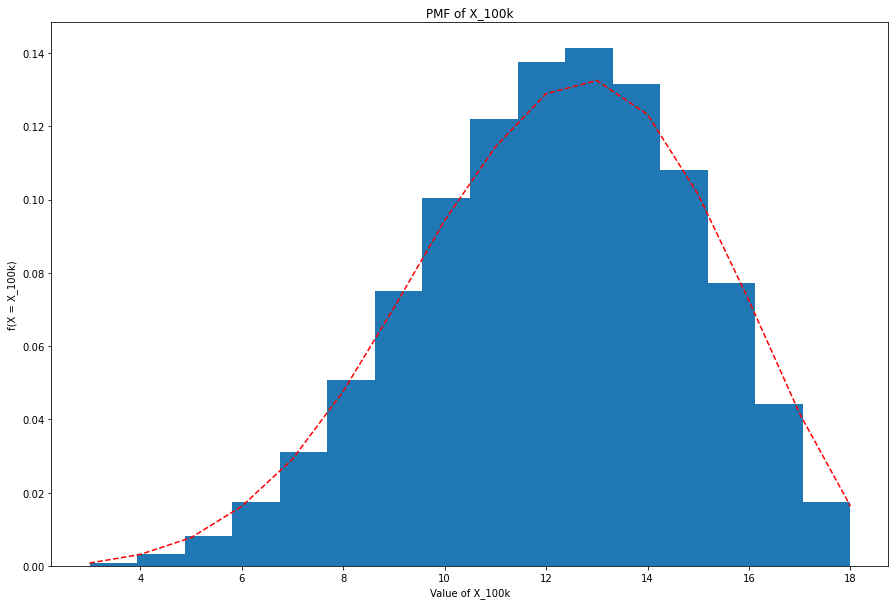

In [41]:
np.random.seed(1)
X_100k_set = list(set(X_100k))

p_vec_100k = []
for i in X_100k_set:
    p_100k = X_100k.count(i)/len(X_100k)
    p_vec_100k.append(p_100k)
p_vec_100k

pmf_df = pd.DataFrame({'Possible 4d6 rolls':X_100k_set, 'Probabilities':p_vec_100k})
display(pmf_df)

plt.plot(X_100k_set, p_vec_100k, 'r--')
plt.hist(X_100k, bins = 16, density = True)
plt.title("PMF of X_100k")
plt.xlabel('Value of X_100k')
plt.ylabel('f(X = X_100k)')
plt.show()

#### Q3. (5 pts.)

Estimate $E[X]$ and $\text{Var}(X)$ using your <b><u>estimated pmf</b></u>. Do not use your simulations directly.

In [42]:
EX_analytical = sum([i*j for i,j in zip(X_100k_set,p_vec_100k)])
VarX_analytical = sum([(i**2)*j for i,j in zip(X_100k_set,p_vec_100k)]) - EX_analytical**2


print(f'EX_analytical: {EX_analytical}\nVarX_analytical: {VarX_analytical}')

EX_analytical: 12.244636
VarX_analytical: 8.103543227503991


#### Q4. (5 pts.)

How many samples of $X$ would you need to achieve a 2% margin of error at 97.5% confidence for your estimates?

In [43]:
alpha = 0.025

z = norm.ppf(1-(alpha/2))

N_samples_list = [(z**2)*(p - p**2) / (0.02**2) for p in p_vec_100k]
N_samples_required = max(N_samples_list)
print(f'Minimum Samples Required for my p_hats: {round(N_samples_required)}')


Minimum Samples Required for my p_hats: 1444


#### Q5. (5 pts.)

Players that don't want to roll for ability scores may instead take the "standard array" = \[15, 14, 13, 12, 10, 8\] and assign each value to their choice of ability score. 

Statistically speaking, in what way is rolling for stats better than taking the standard array? 

(Note: points will be awarded for <b><u>clarity and succinctness</b></u>. points will be deducted for <b><u>vagueness and rambling</b></u>.)

#### ANSWER HERE.
Statistics show that the expected value of a fair 4d6 roll is 12.24. This means that for your 6 character abilities your expected sum of ability ratings is 73.44. If you instead refuse to roll, your standard ability ratings will only total to 72.0 in total. This indicates that rolling will most likely yield a better overall character rating than opting for the standard.  

---

## III. Optimization (10 pts.)

### Rosenbrock Function

In mathematical optimization, the [`Rosenbrock function`](https://en.wikipedia.org/wiki/Rosenbrock_function) (also known as Rosenbrock's valley or Rosenbrock's banana function) is a non-convex function that is used to test the performance of optimization algorithms.

Find a minimum of Rosenbrock's function:

\begin{equation}
f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
\end{equation}

<b><u>up to 4 decimal places</b></u> using the Gradient Descent method with your <b><u>initial guess set to</b></u> $\mathbf{x}_0 = [0.9, 0.9]^T$.

#### Some Hints:

1) The actual solution is $\mathbf{x}^* = [1, 1]^T$ with $f(\mathbf{x}^*) = 0$. As such, you should perform enough iterations to reach this solution.

2) One of the challenging aspects of this problem is finding a learning rate $\alpha$ that <b>(1)</b> doesn't cause the method to blow up or go in the wrong direction and <b>(2)</b> doesn't take forever to converge!

3) Finding a solution (even up to just 4 decimal places) may take A LOT of iterations.

4) You don't have to print out the result of every iteration. You could, for example, only print the results every 100 or 1000 iterations.

5) Always check your $f(\mathbf{x}_k)$ to see if you're actually going in the right direction!

In [28]:
# Your code here
def f(x):
    return 100*(x[1] - x[0]**2)**2 + (1-x[0])**2

x_k = np.array([0.9,0.9]) #arbitrary set to 1 to keep it simple
alpha = 0.0001
print('alpha = %.2f' %alpha)
for k in range(0, 1000000):
    if k%100 == 0:
        print("k = %d --" %k,"-- x_k[0] = %.4f --" %x_k[0],"-- x_k[1] = %.4f --" %x_k[1], "-- f(x_k) = %.4f" %f(x_k))
    x_k = x_k - alpha*np.array([400*x_k[0]**3 + x_k[0]*(2 - 400*x_k[1]) - 2, 200*(x_k[1]-x_k[0]**2)])

alpha = 0.00
k = 0 -- -- x_k[0] = 0.9000 -- -- x_k[1] = 0.9000 -- -- f(x_k) = 0.8200
k = 100 -- -- x_k[0] = 0.9382 -- -- x_k[1] = 0.8799 -- -- f(x_k) = 0.0038
k = 200 -- -- x_k[0] = 0.9384 -- -- x_k[1] = 0.8804 -- -- f(x_k) = 0.0038
k = 300 -- -- x_k[0] = 0.9387 -- -- x_k[1] = 0.8809 -- -- f(x_k) = 0.0038
k = 400 -- -- x_k[0] = 0.9390 -- -- x_k[1] = 0.8814 -- -- f(x_k) = 0.0037
k = 500 -- -- x_k[0] = 0.9393 -- -- x_k[1] = 0.8820 -- -- f(x_k) = 0.0037
k = 600 -- -- x_k[0] = 0.9395 -- -- x_k[1] = 0.8825 -- -- f(x_k) = 0.0037
k = 700 -- -- x_k[0] = 0.9398 -- -- x_k[1] = 0.8830 -- -- f(x_k) = 0.0036
k = 800 -- -- x_k[0] = 0.9401 -- -- x_k[1] = 0.8835 -- -- f(x_k) = 0.0036
k = 900 -- -- x_k[0] = 0.9403 -- -- x_k[1] = 0.8840 -- -- f(x_k) = 0.0036
k = 1000 -- -- x_k[0] = 0.9406 -- -- x_k[1] = 0.8844 -- -- f(x_k) = 0.0035
k = 1100 -- -- x_k[0] = 0.9408 -- -- x_k[1] = 0.8849 -- -- f(x_k) = 0.0035
k = 1200 -- -- x_k[0] = 0.9411 -- -- x_k[1] = 0.8854 -- -- f(x_k) = 0.0035
k = 1300 -- -- x_k[0] = 

In [29]:
''' if alpha = 0.001, x* = [1,1] at iteration k = 193400'''

' if alpha = 0.001, x* = [1,1] at iteration k = 193400'

---

## IV. Linear Regression and Gradient Descent (30 pts.)

A simple linear regression model is defined as:

\begin{align*}
    y = \theta_0 + \theta_1 x + \varepsilon
\end{align*}

where $\theta_0$ is the intercept and $\theta_1$ is the slope. Ignore $\varepsilon$ for now.

These parameters are unknown and must be estimated using the data.

For this section, we will load the `diabetes` dataset using `sklearn` and fit a simple linear regression model to the data.

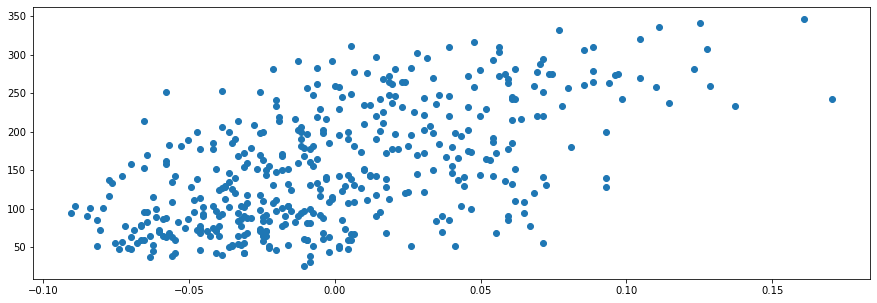

In [16]:
# Load the diabetes dataset
x, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
x = x[:, 2]
plt.scatter(x,y)
plt.show()

#### Q1. (5 pts.)

Using gradient descent, we can estimate the parameters of the simple linear regression model $\hat{\theta}_0$ and $\hat{\theta}_1$ by minimizing the <b><i>mean squared error</b></i> (MSE):

\begin{align*}
    J(\hat{\theta}_0, \hat{\theta}_1) &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
    &= \frac{1}{n} \sum_{i=1}^{n} (y_i - (\hat{\theta}_0 + \hat{\theta}_1 x_i))^2
\end{align*}

where $(x_i, y_i)$ are the data points, and $n$ is the number of observations.

What is $\nabla J$? 

(<b><i>HINT:</b></i> Remember that all the $(x_i, y_i)$ values are fixed and known!)

\begin{align*}
    \nabla J(\hat{\theta}_0, \hat{\theta}_1)
    &= \begin{bmatrix}
    \frac{-1}{221} \sum_{i=1}^{442} (y_i - (\hat{\theta}_0 + \hat{\theta}_1 x_i) \\
    \frac{-1}{221} \sum_{i=1}^{442} (x_i)(y_i - (\hat{\theta}_0 + \hat{\theta}_1 x_i)
    \end{bmatrix} \\
\end{align*}

#### Q2. (20 pts.)

Solve for $\hat{\theta}_0$ and $\hat{\theta}_1$ using gradient descent <b><u>up to 4 decimal places</b></u> with your <b><u>initial guess set to</b></u> $\mathbf{\theta} = [1, 1]^T$.

#### Some Hints:

1) The hints in the Rosenbrock Function problem also apply here. Read them again!

2) You can check your answer by comparing it to the estimates of `sklearn.linear_model`. As such, you should perform enough iterations to reach `sklearn`'s solution.

3) The method you are implementing is actually called <b>batch gradient descent</b>. The "batch" refers to the fact that we are passing the entire dataset to the optimizer in each iteration. This is seldom done in practice, especially if your dataset is large and your model has a lot of parameters.

In [24]:


def G(theta_k, x, y):
    y_minus_yhat_sq = [(y_i-(theta_k[0] + theta_k[1]*x_i))**2 for x_i,y_i in zip(x,y)]
    return (1/442)*(sum(y_minus_yhat_sq))

def grad_theta_0(theta_k,x,y):
    to_sum = [(y_i - (theta_k[0] + theta_k[1]*x_i)) for x_i,y_i in zip(x,y)]
    return (-1/221)*(sum(to_sum))

def grad_theta_1(theta_k,x,y):
    to_sum = [x_i*(y_i - (theta_k[0] + theta_k[1]*x_i)) for x_i,y_i in zip(x,y)]
    return (-1/221)*(sum(to_sum))


theta_k = np.array([1, 1]) #intial guess
alpha = 0.001 #abitrary

print('alpha = %.2f' %alpha)
for k in range(0, 10000000):
    if k % 1000 == 0:
        print("k = %d --" %k,"-- theta_k[0] = %.4f --" %theta_k[0],"-- theta_k[1] = %.4f --" %theta_k[1], "-- G(theta_k) = %.4f" %G(theta_k,x,y))
    theta_k = theta_k - alpha*np.array([grad_theta_0(theta_k,x,y), grad_theta_1(theta_k,x,y)])
    

alpha = 0.00
k = 0 -- -- theta_k[0] = 1.0000 -- -- theta_k[1] = 1.0000 -- -- G(theta_k) = 28766.9211
k = 1000 -- -- theta_k[0] = 131.7207 -- -- theta_k[1] = 5.2819 -- -- G(theta_k) = 6323.9379
k = 2000 -- -- theta_k[0] = 149.3764 -- -- theta_k[1] = 9.5444 -- -- G(theta_k) = 5896.6886
k = 3000 -- -- theta_k[0] = 151.7611 -- -- theta_k[1] = 13.7877 -- -- G(theta_k) = 5871.2204
k = 4000 -- -- theta_k[0] = 152.0832 -- -- theta_k[1] = 18.0119 -- -- G(theta_k) = 5853.2409
k = 5000 -- -- theta_k[0] = 152.1267 -- -- theta_k[1] = 22.2169 -- -- G(theta_k) = 5835.5557
k = 6000 -- -- theta_k[0] = 152.1326 -- -- theta_k[1] = 26.4030 -- -- G(theta_k) = 5818.0324
k = 7000 -- -- theta_k[0] = 152.1334 -- -- theta_k[1] = 30.5702 -- -- G(theta_k) = 5800.6669
k = 8000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = 34.7186 -- -- G(theta_k) = 5783.4579
k = 9000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = 38.8482 -- -- G(theta_k) = 5766.4039
k = 10000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = 42.9593

KeyboardInterrupt: 

In [31]:
''' if alpha = 0.001, theta* = [152.1335,949.4352] '''

' if alpha = 0.001, theta* = [152.1335,949.4352] '

#### Q3. (5 pts.)

Plot the data and the fitted model.

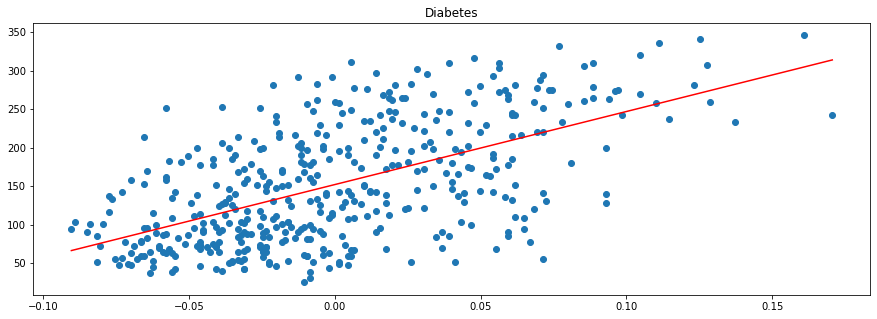

In [27]:
# Your code here
opt_theta = np.array([152.1335,949.4352])

def linear_regression(x,m,b):
    return m*x + b

x_range = np.linspace(min(x),max(x), len(x))

plt.plot(x_range, linear_regression(x_range,opt_theta[1], opt_theta[0]), 'r-')
plt.scatter(x,y)
plt.title("Diabetes")

plt.show()